**Unidade 4: Modelos Autoregressivos, Médias Móveis e Transformações**

* Avaliação do Desempenho Preditivo de Modelos

* Modelos ARIMA (x) / SARIMA (x):
    * Introdução;
    * Definição;
    * Especificação;
    * Estimação;
    * Previsão;
    * *Caso prático.*

## Funções Úteis

In [1]:
from statsmodels.tsa.stattools import adfuller, kpss

# TESTE ADF
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

# TESTE KPSS
def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        data = kpsstest[0:3], index = ["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)


## **Instalando as bibliotecas que usaremos**

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.5 MB/s eta 0:00:00


## **Segmentações do conjunto de dados**

#### Bibliotecas

In [ ]:
import pmdarima as pm
from pmdarima.model_selection import RollingForecastCV, SlidingWindowForecastCV

#### Dados

In [ ]:
wineind = pm.datasets.load_wineind()

### Inspeção

In [ ]:
wineind

array([15136., 16733., 20016., 17708., 18019., 19227., 22893., 23739.,
       21133., 22591., 26786., 29740., 15028., 17977., 20008., 21354.,
       19498., 22125., 25817., 28779., 20960., 22254., 27392., 29945.,
       16933., 17892., 20533., 23569., 22417., 22084., 26580., 27454.,
       24081., 23451., 28991., 31386., 16896., 20045., 23471., 21747.,
       25621., 23859., 25500., 30998., 24475., 23145., 29701., 34365.,
       17556., 22077., 25702., 22214., 26886., 23191., 27831., 35406.,
       23195., 25110., 30009., 36242., 18450., 21845., 26488., 22394.,
       28057., 25451., 24872., 33424., 24052., 28449., 33533., 37351.,
       19969., 21701., 26249., 24493., 24603., 26485., 30723., 34569.,
       26689., 26157., 32064., 38870., 21337., 19419., 23166., 28286.,
       24570., 24001., 33151., 24878., 26804., 28967., 33311., 40226.,
       20504., 23060., 23562., 27562., 23940., 24584., 34303., 25517.,
       23494., 29095., 32903., 34379., 16991., 21109., 23740., 25552.,
      

## Janela crescente e deslizante **à direita**



### **RollingForecastCV - Parameters:**

* h : int, optional (default=1)

    The forecasting horizon, or the number of steps into the future after the last training sample for the test set.

* step : int, optional (default=1)

    The size of step taken to increase the training sample size.

* initial : int, optional (default=None)

    The initial training size. If None, will use 1 // 3 the length of the time series.

In [ ]:
cv = RollingForecastCV()
cv_generator = cv.split(wineind)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]),
 array([58]))

### 3 passos de horizonte de projeção

In [ ]:
cv = RollingForecastCV(h = 3)
cv_generator = cv.split(wineind)
next(cv_generator)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]),
 array([58, 59, 60]))

In [ ]:
next(cv_generator)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58]),
 array([59, 60, 61]))

### Incremento de duas observações no conjunto de treino

In [ ]:
cv = RollingForecastCV(step = 3)
cv_generator = cv.split(wineind)
next(cv_generator)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]),
 array([58]))

In [ ]:
next(cv_generator)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60]),
 array([61]))

In [ ]:
next(cv_generator)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),
 array([64]))

## **SlidingWindowForecastCV - Parameters**:

* h : int, optional (default=1)

    The forecasting horizon, or the number of steps into the future after the last training sample for the test set.

* step : int, optional (default=1)

    The size of step taken between training folds.

* window_size : int or None, optional (default=None)

    The size of the rolling window to use. If None, a rolling window of size n_samples // 5 will be used.

In [ ]:
cv = SlidingWindowForecastCV(h = 5)
cv_generator = cv.split(wineind)

### 5 passos de horizonte de projeção

In [ ]:
next(cv_generator)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 array([35, 36, 37, 38, 39]))

In [ ]:
next(cv_generator)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35]),
 array([36, 37, 38, 39, 40]))

### Incremento de 3 observações no conjunto de treino

In [ ]:
cv = SlidingWindowForecastCV(step = 3)
cv_generator = cv.split(wineind)
next(cv_generator)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 array([35]))

In [ ]:
next(cv_generator)

(array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
        20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        37]),
 array([38]))

In [ ]:
next(cv_generator)

(array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
        23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
        40]),
 array([41]))

## Time Series Split (Scikit-learn)

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

### Dados

In [ ]:
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])

Exemplo com Time Series Split

In [ ]:
tscv = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None)
for train, test in tscv.split(X):
     print("%s %s" % (train, test))

[0 1 2] [3]
[0 1 2 3] [4]
[0 1 2 3 4] [5]


### Particão dos dados em 5 configurações

In [ ]:
tscv = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
for train, test in tscv.split(X):
     print("%s %s" % (train, test))

[0] [1]
[0 1] [2]
[0 1 2] [3]
[0 1 2 3] [4]
[0 1 2 3 4] [5]


Cuidado com os métodos usados para segmentar dados em séries temporais, uma vez que precisamos respeitar o momento em que as observações ocorreram - índice.

O método a seguir **não** é adequado para segmentar séries temporais em conjuntos de treino e teste.

In [ ]:
from sklearn.model_selection import ShuffleSplit
X = np.arange(10)
ss = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
for train_index, test_index in ss.split(X):
     print("%s %s" % (train_index, test_index))

[9 1 6 7 3 0 5] [2 8 4]
[2 9 8 0 6 7 4] [3 5 1]
[4 5 1 0 6 9 7] [2 3 8]
[2 7 5 8 0 3 4] [6 1 9]
[4 1 0 6 8 9 3] [5 2 7]


## Medidas de avaliação do desempenho de medidas de ajuste

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA


### Dados

In [ ]:

dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range("1700", "2008"))
dta.index.freq = dta.index.inferred_freq
del dta["YEAR"]
dta = dta.tail(20) # Vamos restringir nossa análise a 20 observações

### Ajustando um AR(2)

In [ ]:
arma_mod20 = ARIMA(dta, order=(2, 0, 0)).fit()
print(arma_mod20.params)

const      68.263735
ar.L1       1.536259
ar.L2      -0.748062
sigma2    276.363977
dtype: float64


### Avaliando o critério AICc

In [ ]:
arma_mod20.aicc

182.97866381426465

## Avaliando Estatísticas em Séries Temporais

A biblioteca pdmarima possui opções práticas para acompanhar transformações em séries temporais.

In [ ]:
import pmdarima as pm
from pmdarima import datasets
from pmdarima import preprocessing

### Dados

In [ ]:
y = datasets.load_sunspots(True)
print(y.head())

Jan 1749    58.0
Feb 1749    62.6
Mar 1749    70.0
Apr 1749    55.7
May 1749    85.0
dtype: float64


Série Original

/usr/local/lib/python3.10/dist-packages/pmdarima/utils/visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead.
  res = tsaplots.plot_acf(


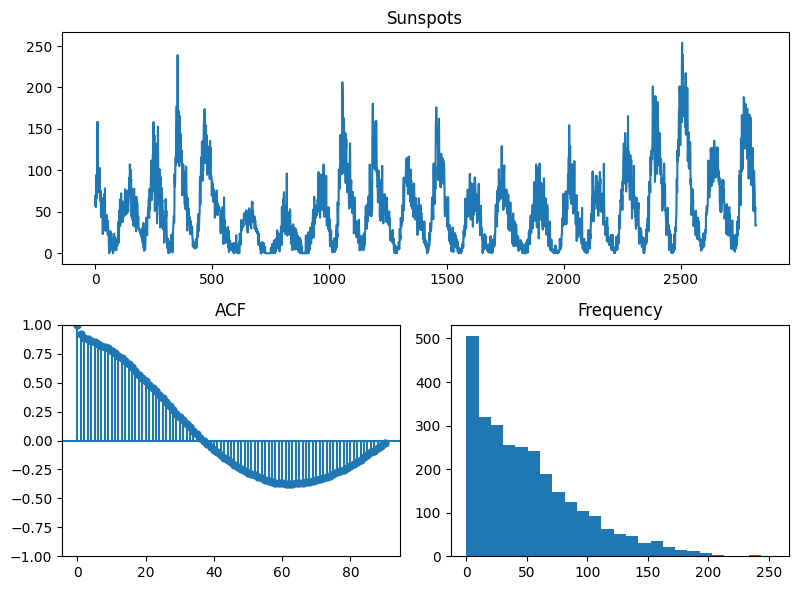

In [ ]:
pm.tsdisplay(y, lag_max=90, title="Sunspots", show=True)

Série Transformada

/usr/local/lib/python3.10/dist-packages/pmdarima/utils/visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead.
  res = tsaplots.plot_acf(


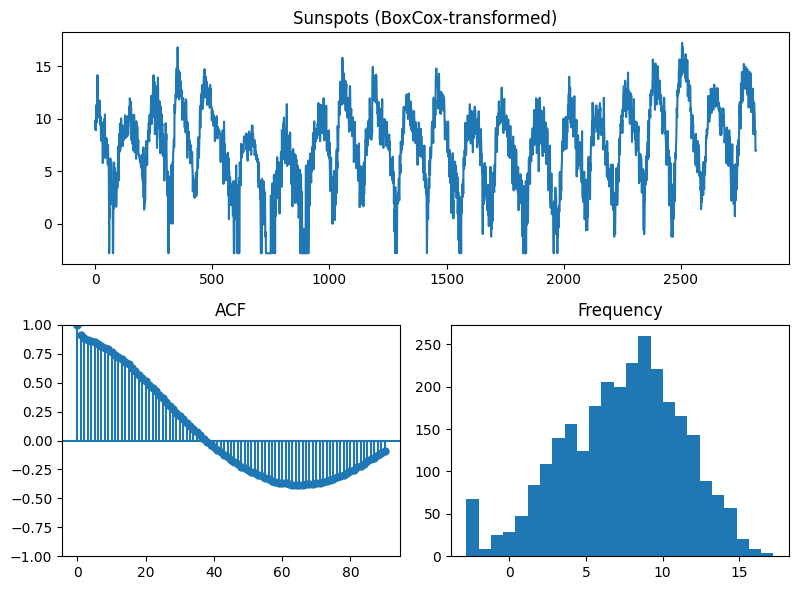

In [ ]:
y_bc, _ = preprocessing.BoxCoxEndogTransformer(lmbda2=1e-6).fit_transform(y)
pm.tsdisplay(
    y_bc, lag_max=90, title="Sunspots (BoxCox-transformed)", show=True)

## Modelo **ARIMA**

### Bibliotecas Necessárias

In [16]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

import requests
from io import BytesIO
from zipfile import ZipFile

### Dados

In [4]:
df = pd.read_table(
    "https://raw.githubusercontent.com/jrnold/ssmodels-in-stan/master/StanStateSpace/data-raw/DK-data/internet.dat",
    skiprows=1, header=None, sep='\s+', engine='python',
    names=['internet','dinternet']
)

df = df['internet']

### Inspeção Dados

In [ ]:
df.head()

0    88
1    84
2    85
3    85
4    84
Name: internet, dtype: int64

<Axes: >

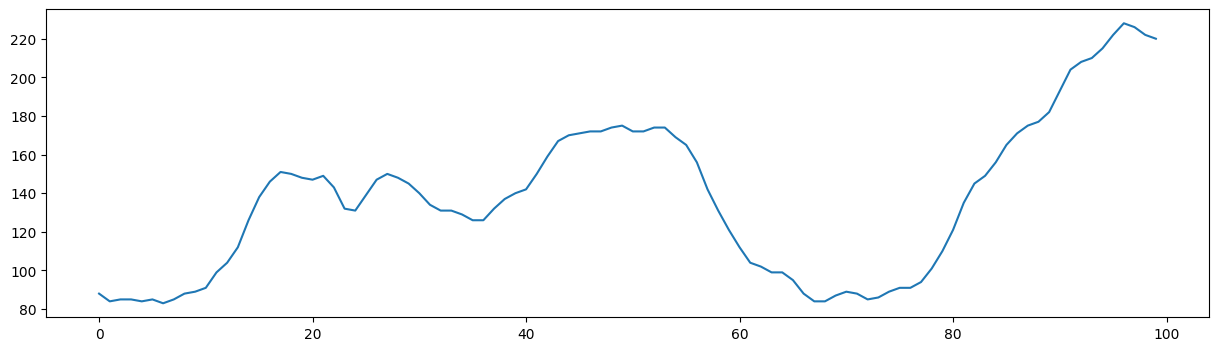

In [ ]:
fig, ax = plt.subplots(figsize=(15,4))
df.plot(ax = ax)

### ACF

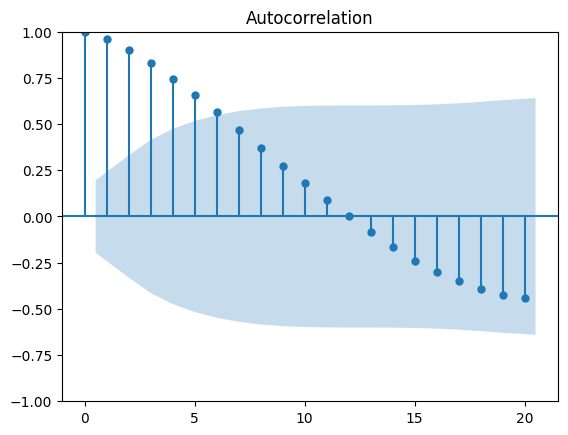

In [ ]:
plot_acf(df);

### PACF

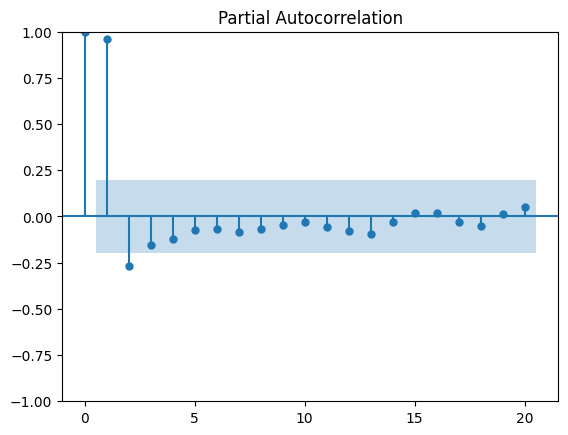

In [ ]:
plot_pacf(df);

### Primeiras Diferenças

<Axes: >

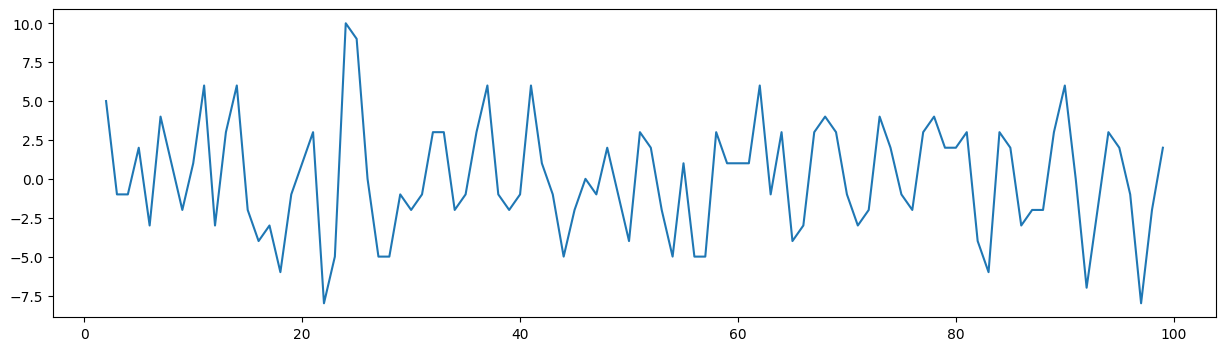

In [14]:
df_diff = df.diff().dropna()

fig, ax = plt.subplots(figsize=(15,4))
df_diff.plot(ax = ax)

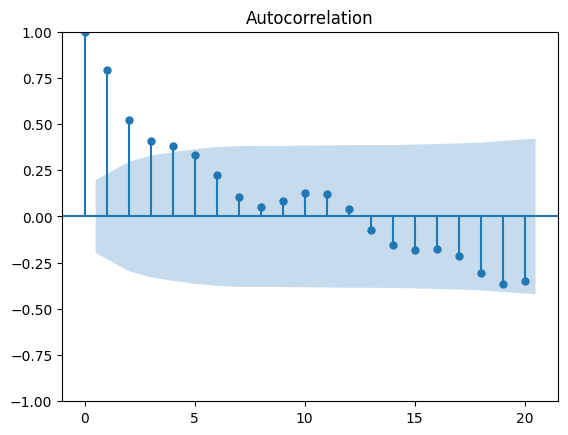

In [6]:
plot_acf(df_diff);

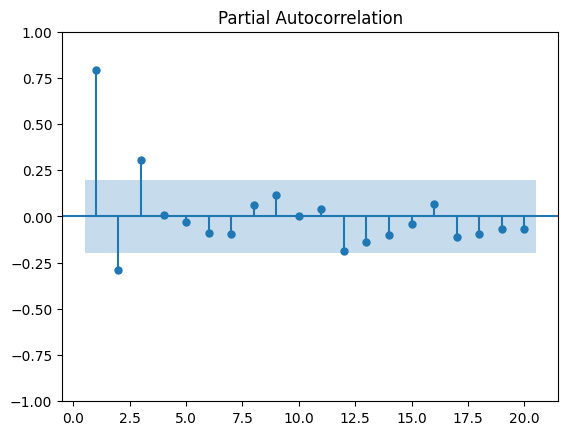

In [ ]:
plot_pacf(df_diff, zero = False);

### Vamos ajustar um modelo autoregressivo

In [17]:
model_ar = ARIMA(df_diff, order=(3, 0, 0)).fit()
print(model_ar.summary())

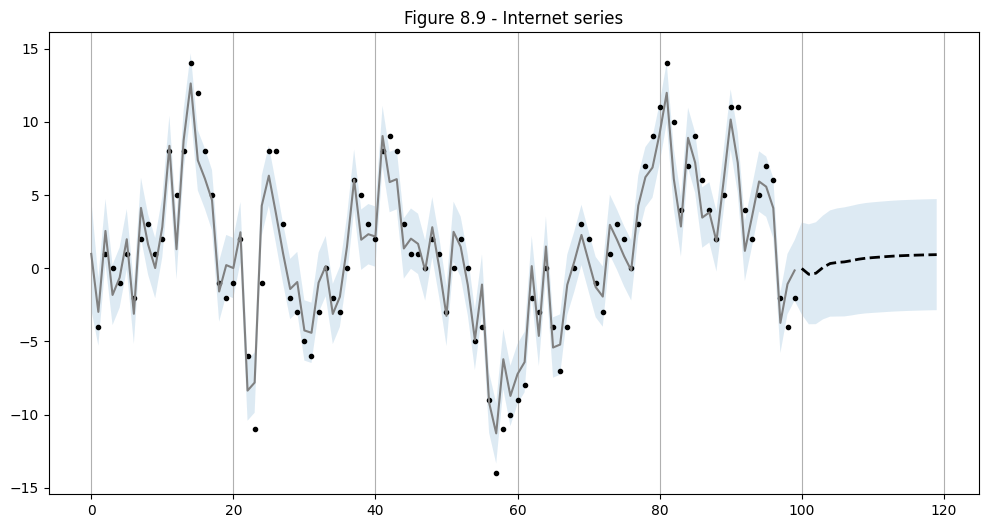

In [ ]:

import warnings
warnings.filterwarnings("ignore")

mod = model_ar = ARIMA(df_diff, order=(3, 0, 0))
res = mod.fit()
res

# In-sample one-step-ahead predictions, and out-of-sample forecasts
nforecast = 20
predict = res.get_prediction(end=mod.nobs + nforecast)
idx = np.arange(len(predict.predicted_mean))
predict_ci = predict.conf_int(alpha=0.5)

# Graph
fig, ax = plt.subplots(figsize=(12,6))
ax.xaxis.grid()
ax.plot(df_diff, 'k.')

# Plot
ax.plot(predict.predicted_mean[:-nforecast].index, predict.predicted_mean[:-nforecast], 'gray')
ax.plot(predict.predicted_mean[-nforecast:].index, predict.predicted_mean[-nforecast:], 'k--', linestyle='--', linewidth=2)
ax.fill_between(predict_ci.iloc[:, 0].index, predict_ci.iloc[:, 0], predict_ci.iloc[:, 1], alpha=0.15)

ax.set(title='Figure 8.9 - Internet series');

### Métrica AIC e AICc

In [ ]:
print('AICc', res.aicc)

print('AICc', res.aic)

AICc 514.3101539369374
AICc 513.6649926466148


## Auto ARIMA

In [ ]:
from pmdarima.arima import AutoARIMA

auto = AutoARIMA(seasonal = False)

auto.fit(df)

AutoARIMA(seasonal=False)

In [ ]:
print(auto.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(2, 0, 2)   Log Likelihood                -256.784
Date:                Sat, 02 Mar 2024   AIC                            525.569
Time:                        21:13:52   BIC                            541.200
Sample:                             0   HQIC                           531.895
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.3642      0.791      2.989      0.003       0.814       3.914
ar.L1          1.9281      0.051     37.526      0.000       1.827       2.029
ar.L2         -0.9452      0.052    -18.297      0.0

Modelo **SARIMA**

### Dados

In [ ]:
air2 = requests.get('https://www.stata-press.com/data/r12/air2.dta').content
data = pd.read_stata(BytesIO(air2))
data.index = pd.date_range(start=datetime(int(data.time[0]), 1, 1), periods=len(data), freq='MS')
data['lnair'] = np.log(data['air'])

### Modelo

In [ ]:
# Fit the model
mod = sm.tsa.statespace.SARIMAX(data['lnair'], order=(2,1,0), seasonal_order=(1,1,0,12), simple_differencing=True)
res = mod.fit(disp=False)
print(res.summary())

0     -3.869112
1     -5.517586
2      0.069489
3     -4.088001
4     -2.874533
         ...   
115   -3.941200
116   -3.931027
117   -3.921621
118   -3.913600
119   -3.907000
Name: lower internet, Length: 120, dtype: float64

Modelo **ARIMA(X)**


### Dados

In [ ]:
friedman2 = requests.get('https://www.stata-press.com/data/r12/friedman2.dta').content
data = pd.read_stata(BytesIO(friedman2))
data.index = data.time
data.index.freq = "QS-OCT"

### Variáveis

In [ ]:
# Variables
endog = data.loc['1959':'1981', 'consump']
exog = sm.add_constant(data.loc['1959':'1981', 'm2'])

### Ajuste do Modelo

In [ ]:
mod = sm.tsa.statespace.SARIMAX(endog, exog, order=(1,0,1))
res = mod.fit(disp=False)
print(res.summary())